[Portfolio](https://tillmeineke.github.io) | [LinedIn](https://www.linkedin.com/in/tillmeineke) | [GitHub](https://github.com/TillMeineke) | [Medium](https://medium.com/@till.meineke)

# EDA of self-generated secondary mushroom dataset

Let's get started...

<div style="text-align:center;">
  <img src="../images/happycodingshroom.webp" alt="Happy coding" style="width:300px;height:auto;">
</div>

source: [giphy.com](https://giphy.com/gifs/internet-computer-typing-7TcdtHOCxo3meUvPgj)

## Importing Libraries

In [65]:
import sys

# setting path
sys.path.append("../")
from src import data_cat, gen_corr_norm, mushroom_class_fix, stats_graphics, util_func

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [67]:
df = pd.read_csv("../data/secondary_data_generated_with_names.csv", sep=";")
df.head(5).T

,0,1,2,3,4
family,Amanita Family,Amanita Family,Amanita Family,Amanita Family,Amanita Family
name,Fly Agaric,Fly Agaric,Fly Agaric,Fly Agaric,Fly Agaric
class,p,p,p,p,p
cap-diameter,17.14,15.48,15.19,14.85,15.91
cap-shape,x,f,f,f,x
cap-surface,h,h,g,h,h
cap-color,o,e,o,e,e
does-bruise-or-bleed,f,f,f,f,f
gill-attachment,e,e,e,e,e
gill-spacing,NaN,NaN,NaN,NaN,NaN


New generated data is loaded from the file, but after generating, it is still sorted by `family`and `name` columns.
So before splitting the data into train, val and test sets, we need to shuffle the data.

In [68]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(5).T

,0,1,2,3,4
family,Wax Gill Family,Cortinarius Family,Amanita Family,Amanita Family,Amanita Family
name,Orange-red Wax Cap,Dark-centred Hebeloma,False Panther Cap,The Blusher,Panther Cap
class,p,p,p,e,p
cap-diameter,2.44,3.84,12.36,10.58,7.1
cap-shape,f,x,f,f,x
cap-surface,s,t,NaN,NaN,g
cap-color,o,n,g,n,n
does-bruise-or-bleed,f,f,f,t,f
gill-attachment,d,s,e,NaN,e
gill-spacing,NaN,c,NaN,NaN,NaN


Much better.

Let's see how much data we have.

In [69]:
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

Number of Samples: 61069
Number of Features: 23


In [70]:
df.dtypes

family                   object
name                     object
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

We see `cap-diameter`, `stem-height` and `stem-width` are numerical features.
All other features are  object type, but should be categorical, to be more memory efficient.

In [71]:
round(df.describe(), 3)

,cap-diameter,stem-height,stem-width
count,61069.000,61069.000,61069.000
mean,6.742,6.591,12.153
std,5.259,3.382,9.992
min,0.410,0.000,0.000
25%,3.490,4.640,5.200
50%,5.870,5.970,10.180
75%,8.540,7.750,16.570
max,61.500,33.060,100.710


In [72]:
df.nunique()

family                    23
name                     173
class                      2
cap-diameter            2587
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2238
stem-width              4616
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

### Missing Values

In [73]:
# check null values
df.isnull().sum()

family                      0
name                        0
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

We see a lot of missing values for `veil-type`, `spore-print-color`, `veil-color`, `stem-root`, `stem-surface` with more than half the values missing. For the first four features there is even more than 80% missing values.

`gill-spacing`, `cap-surface` and `gill-attachment` have 15% - 40% missing values.

`ring-type` has ca. 4% missing values.

Since we want a **simple model with few features** to predict the name of the mushroom, we will drop the features with missing values for our first round of modelling.

Other methods to handle missing values could be:
- imputation with mean, median or mode
- imputation with a constant value
- imputation with a value estimated by a model
- creating a new category for missing values
- looking for data in literature or other sources to fill in the missing values

In the [paper](../references/Mushroom%20data%20creation_sup.pdf) I used for generating data, the authors handled missing values for their generated data like this:

> **Second data curation** for correct data encoding. We handle missing values by using an imputation method, i.e., a threshold based filtering. Replacements using the most frequent single imputation is a strong simplification, however it is a common approach for missing imputation of nominal variables.

In [74]:
# drop columns with missing values
df_no_missing = df.dropna(axis=1, inplace=False)
df_no_missing = df_no_missing.drop(columns=["family"], inplace=False)
df_no_missing = df_no_missing.drop(columns=["class"], inplace=False)


In [75]:
print(
    f"Number of Features after dropping columns with missing values: {df_no_missing.shape[1]}"
)

Number of Features after dropping columns with missing values: 12


In [76]:
from src.mushroom_class_fix import get_variables_missing_dict

get_variables_missing_dict(df)

{'cap-surface': 0.23121387283236994,
 'gill-attachment': 0.16184971098265896,
 'gill-spacing': 0.41040462427745666,
 'stem-root': 0.8439306358381503,
 'stem-surface': 0.6242774566473989,
 'veil-type': 0.9479768786127167,
 'veil-color': 0.8786127167630058,
 'ring-type': 0.04046242774566474,
 'spore-print-color': 0.8959537572254336}

In [77]:
get_variables_missing_dict(df_no_missing)

{}

### Duplicate values

In [78]:
df_no_missing[df_no_missing.duplicated()].groupby("name").count()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
name,,,,,,,,,,,
Hairy Stereum,8,8,8,8,8,8,8,8,8,8,8
Orange Moss Agaric,1,1,1,1,1,1,1,1,1,1,1
Silver Leaf Fungus,94,94,94,94,94,94,94,94,94,94,94
Soft Slipper Toadstool,52,52,52,52,52,52,52,52,52,52,52


In [79]:
df_no_missing = df_no_missing.drop_duplicates()
df_no_missing.duplicated().sum()

0

## Feature importance analysis

### Target variable analysis

<Axes: xlabel='name', ylabel='Count'>

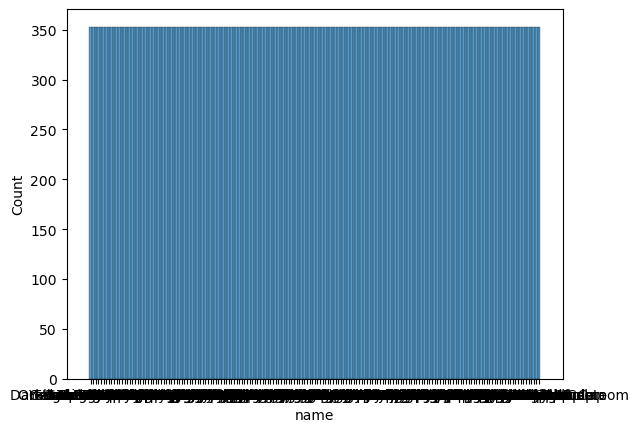

In [80]:
sns.histplot(df["name"])

In [81]:
# round(df.name.mean(), 3)

# FIXME: not working because of strings -> LabelEncoder

In [82]:
from src.mushroom_class_fix import encode_data_numerical


df_LE = encode_data_numerical(df_no_missing).copy()
df_LE.head(5).T

,0,1,2,3,4
name,94,40,55,145,96
cap-diameter,2.44,3.84,12.36,10.58,7.1
stem-height,3.15,4.92,11.29,12.04,8.79
stem-width,5.35,7.96,15.24,21.48,16.65
cap-shape_b,False,False,False,False,False
...,...,...,...,...,...
habitat_w,False,False,False,False,False
season_a,True,True,False,False,True
season_s,False,False,False,False,False
season_u,False,False,True,True,False


### Feature importance

In [83]:
# Correlation
corr = df_LE.corrwith(df_LE.name)
abs(corr).sort_values(ascending=False).head(15)
# (corr).sort_values(ascending=False)

name                      1.000000
does-bruise-or-bleed_t    0.155108
does-bruise-or-bleed_f    0.155108
cap-shape_p               0.128470
season_w                  0.122288
gill-color_y              0.120440
cap-color_k               0.119400
cap-color_y               0.112606
stem-color_o              0.100809
gill-color_g              0.096007
cap-color_u               0.090785
stem-color_b              0.086764
stem-width                0.078830
cap-diameter              0.077313
cap-shape_s               0.077223
dtype: float64

<Axes: >

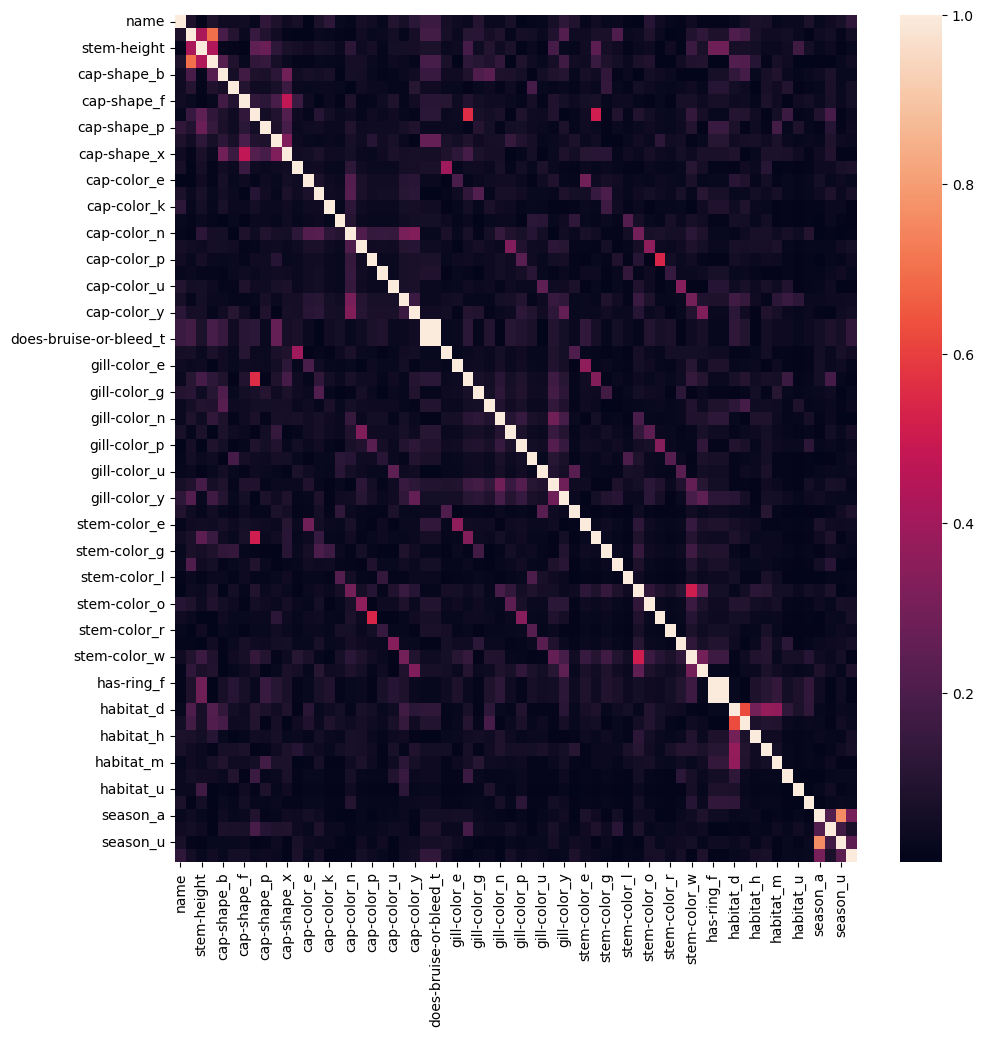

In [84]:
plt.figure(figsize=(11, 11))
sns.heatmap(abs(df_LE.corr()), fmt=".2f", annot=False)

In [85]:
cat_features = [
    #    "family",
    #    "class",
    "cap-shape",
    "cap-color",
    "does-bruise-or-bleed",
    "gill-color",
    "stem-color",
    "has-ring",
    "habitat",
    "season",
]
cat_features

['cap-shape',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-color',
 'stem-color',
 'has-ring',
 'habitat',
 'season']

In [86]:
num_features = [
    "cap-diameter",
    "stem-height",
    "stem-width",
]
num_features

['cap-diameter', 'stem-height', 'stem-width']

In [87]:
df_no_missing[cat_features].nunique()

cap-shape                7
cap-color               12
does-bruise-or-bleed     2
gill-color              12
stem-color              13
has-ring                 2
habitat                  8
season                   4
dtype: int64

In [88]:
# female_mean = df[df.sex == 0].output.mean()
# female_mean
# # Output: 0.75
# male_mean = df[df.sex == 1].output.mean()
# male_mean
# # Output: 0.45

season_w_mean = df_LE[df_LE.season_w == 0].name.mean()
season_w_mean

87.78834885142179

In [89]:
season_u_mean = df_LE[df_LE.season_u == 0].name.mean()
season_u_mean

83.37450042069835

In [90]:
df_no_missing.season.value_counts()

season
a    30015
u    22882
w     5280
s     2737
Name: count, dtype: int64

In [91]:
df_LE.columns

Index(['name', 'cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p',
       'cap-shape_s', 'cap-shape_x', 'cap-color_b', 'cap-color_e',
       'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n',
       'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f',
       'does-bruise-or-bleed_t', 'gill-color_b', 'gill-color_e',
       'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n',
       'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e',
       'stem-color_f', 'stem-color_g', 'stem-color_k', 'stem-color_l',
       'stem-color_n', 'stem-color_o', 'stem-color_p', 'stem-color_r',
       'stem-color_u', 'stem-color_w', 'stem-color_y', 'has-ring_f',
       'has-ring_t', 'habitat_d', 'habitat_g', 'habitat_h', 'habitat_l',
       'habitat_m', 'habitat_p',

## FIXME: Stuff missing

## Test-Train-Validation Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
df_full_train, df_test = train_test_split(
    df_no_missing, test_size=0.2, random_state=42, stratify=df_no_missing["name"]
)

In [139]:
len(df_full_train), len(df_test)

(48731, 12183)

In [95]:
df_train, df_val = train_test_split(
    df_full_train, test_size=0.25, random_state=42, stratify=df_full_train["name"]
)

In [96]:
len(df_train), len(df_val), len(df_test)

(36548, 12183, 12183)

In [97]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [98]:
df_train

,name,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,Tubed Chanterelle,3.77,s,y,f,f,6.95,7.31,y,f,d,a
1,Red-staining Inocybe,6.19,c,w,t,y,6.30,12.15,w,f,g,s
2,Destroying Angel,6.80,b,w,f,w,11.28,10.95,w,t,d,u
3,Orange-red Wax Cap,2.79,f,o,f,y,2.86,4.35,o,f,m,a
4,Birch Russula,4.39,f,y,f,w,6.00,6.92,w,f,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...
36543,The Charcoal Burner,9.24,x,l,f,w,5.86,17.12,w,f,d,a
36544,Peppery Bolete,4.55,x,n,f,n,5.31,10.63,e,f,d,u
36545,Brown Birch Bolete,7.59,x,n,t,g,11.58,25.89,w,f,d,u
36546,Common Funnel Cap,6.57,s,n,f,w,5.03,8.52,w,f,d,a


In [99]:
y_train = (df_train.name).values
y_val = (df_val.name).values
y_test = (df_test.name).values

In [100]:
del df_train["name"]
del df_val["name"]
del df_test["name"]

## One-Hot Encoding

In [101]:
from sklearn.feature_extraction import DictVectorizer

In [102]:
dv = DictVectorizer(sparse=False)

# Convert categorical features to dictionary format
train_dicts = df_train[cat_features + num_features].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[cat_features + num_features].to_dict(orient="records")
X_val = dv.transform(val_dicts)

test_dicts = df_test[cat_features + num_features].to_dict(orient="records")
X_test = dv.transform(test_dicts)

In [103]:
dv.get_feature_names_out()

array(['cap-color=b', 'cap-color=e', 'cap-color=g', 'cap-color=k',
       'cap-color=l', 'cap-color=n', 'cap-color=o', 'cap-color=p',
       'cap-color=r', 'cap-color=u', 'cap-color=w', 'cap-color=y',
       'cap-diameter', 'cap-shape=b', 'cap-shape=c', 'cap-shape=f',
       'cap-shape=o', 'cap-shape=p', 'cap-shape=s', 'cap-shape=x',
       'does-bruise-or-bleed=f', 'does-bruise-or-bleed=t', 'gill-color=b',
       'gill-color=e', 'gill-color=f', 'gill-color=g', 'gill-color=k',
       'gill-color=n', 'gill-color=o', 'gill-color=p', 'gill-color=r',
       'gill-color=u', 'gill-color=w', 'gill-color=y', 'habitat=d',
       'habitat=g', 'habitat=h', 'habitat=l', 'habitat=m', 'habitat=p',
       'habitat=u', 'habitat=w', 'has-ring=f', 'has-ring=t', 'season=a',
       'season=s', 'season=u', 'season=w', 'stem-color=b', 'stem-color=e',
       'stem-color=f', 'stem-color=g', 'stem-color=k', 'stem-color=l',
       'stem-color=n', 'stem-color=o', 'stem-color=p', 'stem-color=r',
       'stem-colo

In [104]:
y_val

array(['Stinking Parasol', 'Dotted-stemmed Bolete', 'Meadow Wax Cap', ...,
       'Red-staining Inocybe', 'Orange-red Wax Cap', 'Bitter Bolete'],
      dtype=object)

## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

LogisticRegression_model_1 = LogisticRegression(solver="liblinear", random_state=1)
LogisticRegression_model_1.fit(X_train, y_train)

val_dict = df_val[cat_features + num_features].to_dict(orient="records")
X_val = dv.transform(val_dict)

# y_pred = LogisticRegression_model_1.predict_proba(X_val)[:,1]
y_pred = LogisticRegression_model_1.predict_proba(X_val)
y_pred

array([[4.29276491e-05, 2.44126906e-05, 8.76695903e-05, ...,
        3.24443412e-06, 1.25546480e-04, 1.46734901e-09],
       [6.93767709e-16, 2.35573164e-09, 6.99102501e-08, ...,
        7.84857256e-08, 9.01893574e-08, 4.25362602e-32],
       [1.39959329e-03, 7.10942730e-04, 3.32949573e-05, ...,
        1.59750790e-03, 2.74785759e-06, 3.39074096e-13],
       ...,
       [3.40607225e-06, 2.03964467e-07, 5.15275126e-07, ...,
        1.49539729e-05, 1.55059235e-04, 6.94509203e-14],
       [4.40561809e-06, 6.56113457e-05, 2.07049879e-04, ...,
        7.53548969e-05, 9.32789708e-08, 2.58739252e-07],
       [9.84296321e-12, 9.11019704e-09, 1.76883700e-09, ...,
        3.51162917e-09, 2.43071108e-10, 4.91033045e-27]])

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Performance of LogisticRegression_model_1:

# Convert predicted probabilities to predicted labels
y_pred_labels = LogisticRegression_model_1.predict(X_val)
probabilities = LogisticRegression_model_1.predict_proba(X_val)

acc_LogisticRegression_model_1 = round(accuracy_score(y_val, y_pred_labels), 5)
print("acc:  ", acc_LogisticRegression_model_1)
# Output: 0.0

roc_LogisticRegression_model_1 = round(
    roc_auc_score(y_val, probabilities, multi_class="ovr"), 5
)
print("roc:  ", roc_LogisticRegression_model_1)
# Output: 0.99995

acc:   0.97808
roc:   0.99995


In [107]:
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.metrics import accuracy_score

# # First, get predicted classes using argmax (as you did before)
# y_pred_labels = LogisticRegression_model_1.predict(X_val)

# # Convert to the same format if needed
# mlb = MultiLabelBinarizer()
# y_val_encoded = mlb.fit_transform(y_val.reshape(-1, 1))
# y_pred_encoded = mlb.transform(y_pred_labels.reshape(-1, 1))

# # Calculate accuracy
# acc = accuracy_score(y_val_encoded, y_pred_encoded)
# acc

In [108]:
# from sklearn.preprocessing import MultiLabelBinarizer

# # Convert labels to proper format first
# mlb = MultiLabelBinarizer()
# y_val_binary = mlb.fit_transform(y_val)
# y_pred_binary = y_pred >= t

# # Now you can use accuracy_score
# acc = accuracy_score(y_val_binary, y_pred_binary)


In [109]:
# thresholds = np.linspace(0, 1, 21)
# accuricies = []


# for t in thresholds:
#     acc = accuracy_score(y_val, y_pred >= t)
#     accuricies.append(acc)

# plt.plot(thresholds, accuricies)

In [110]:
# # Get probabilities per class
# thresholds = np.linspace(0, 1, 21)
# n_classes = y_pred.shape[1]

# # For each class
# for class_idx in range(n_classes):
#     class_scores = y_pred[:, class_idx]
#     # Convert true labels to binary for this class
#     y_true_binary = (y_val == class_idx).astype(int)

#     # Calculate metrics for different thresholds
#     for t in thresholds:
#         y_pred_binary = (class_scores >= t).astype(int)
#         # Calculate your metric (accuracy, f1, etc.)


In [111]:
# from sklearn.metrics import roc_curve

# # For each class
# for class_idx in range(n_classes):
#     fpr, tpr, thresholds = roc_curve(
#         (y_val == class_idx).astype(int), y_pred[:, class_idx]
#     )
#     # Find optimal threshold using Youden's J statistic
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]


In [112]:
from collections import Counter

print("Label distribution:", Counter(y_val))

Label distribution: Counter({'Stinking Parasol': 71, 'Dotted-stemmed Bolete': 71, 'Meadow Wax Cap': 71, 'Hay Cap': 71, 'Tufted Bell Cap': 71, 'Wood Blewit': 71, 'Parasol Mushroom': 71, 'Changeable Melanoleuca': 71, 'Tubed Chanterelle': 71, 'Red-cracked Bolete': 71, 'Oyster Mushroom': 71, 'Bare-toothed Russula': 71, 'Larch Bolete': 71, 'The Charcoal Burner': 71, 'Brown Goblet': 71, 'Ivory Clitocybe': 71, 'Destroying Angel': 71, 'The Miller': 71, 'Horse Mushroom': 71, 'Livid Entoloma': 71, 'Blackening Wax Cap': 71, 'Peppery Bolete': 71, 'Striated Nolanea': 71, 'Yellow-cracked Bolete': 71, 'Hedgehog Fungus': 71, 'Blood-red Cortinarius': 71, 'Greasy Tough Shank': 71, 'The Deceiver': 71, 'Velvet Shank': 71, 'Slippery Jack': 71, 'Oak Milk Cap': 71, 'Slimy Milk Cap': 71, 'Porcelain Mushroom': 71, 'Birch Russula': 71, 'Rusty Carpet Ink Cap': 71, 'The Sickener': 71, 'Plums and custard': 71, 'Sulphur Tricholoma': 71, 'Ear-pick Fungus': 71, 'False Panther Cap': 71, 'Aniseed Funnel Cap': 71, 'Luri

In [113]:
# from sklearn.preprocessing import label_binarize

# # Binarize the labels
# classes = np.unique(y_val)
# y_val_bin = label_binarize(y_val, classes=classes)

# # Calculate ROC curve for each class
# for i in range(len(classes)):
#     fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_pred[:, i])
#     roc_auc = auc(fpr, tpr)

# # plot ROC curve
# plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)


## Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier

dv = DictVectorizer(sparse=True)

train_dict = df_train[cat_features + num_features].to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat_features + num_features].to_dict(orient="records")
X_val = dv.transform(val_dict)

dt_1 = DecisionTreeClassifier(
    #    criterion="entropy",
    #    splitter="best",
    max_depth=3,
    #    min_samples_split=2,
    #    min_samples_leaf=1,
    #    min_weight_fraction_leaf=0.0,
    #    max_features=None,
    random_state=42,
    #    max_leaf_nodes=None,
    #    min_impurity_decrease=0.0,
    #    class_weight=None,
    #    ccp_alpha=0.0,
)

dt_1.fit(X_train, y_train)
y_pred = dt_1.predict_proba(X_val)[:, 1]

In [115]:
# score = y_pred >= 0.5
predicted_labels = dt_1.predict(X_val)
acc_DecisionTree_model_1 = round(accuracy_score(y_val, predicted_labels), 5)
print("acc:  ", acc_DecisionTree_model_1)

acc:   0.02306


??? Why? I don`t understand ATM

In [116]:
y_pred = dt_1.predict_proba(X_val)
roc_DecisionTree_model_1 = round(roc_auc_score(y_val, y_pred, multi_class="ovr"), 5)
print("roc:  ", roc_DecisionTree_model_1)

roc:   0.6538


In [117]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt_2 = DecisionTreeClassifier(max_depth=depth)

    dt_2.fit(X_train, y_train)
    y_pred = dt_2.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_pred, multi_class="ovr")

    print("%4s -> %.3f" % (depth, auc))


   1 -> 0.506
   2 -> 0.511
   3 -> 0.654
   4 -> 0.777
   5 -> 0.805
   6 -> 0.876
  10 -> 0.942
  15 -> 0.982
  20 -> 0.993
None -> 0.989


In [118]:
for depth in [5, 10, 15]:
    print("depth: %s" % depth)
    for min_samples in [1, 5, 10, 15, 20, 50, 100]:
        dt_2 = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples)

        dt_2.fit(X_train, y_train)
        y_pred = dt_2.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class="ovr")

        print("%4s -> %.3f" % (min_samples, auc))


depth: 5
   1 -> 0.805
   5 -> 0.805
  10 -> 0.805
  15 -> 0.805
  20 -> 0.805
  50 -> 0.805
 100 -> 0.805
depth: 10
   1 -> 0.942
   5 -> 0.942
  10 -> 0.942
  15 -> 0.942
  20 -> 0.942
  50 -> 0.942
 100 -> 0.942
depth: 15
   1 -> 0.982
   5 -> 0.982
  10 -> 0.982
  15 -> 0.982
  20 -> 0.982
  50 -> 0.982
 100 -> 0.982


Doesn't change anything.

In [119]:
dt_3 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

dt_3.fit(X_train, y_train)

y_pred = dt_3.predict_proba(X_val)
auc = roc_auc_score(y_val, y_pred, multi_class="ovr")
auc

0.942402398443662

## Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

dv = DictVectorizer(sparse=True)

train_dict = df_train[cat_features + num_features].to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat_features + num_features].to_dict(orient="records")
X_val = dv.transform(val_dict)

rf_1 = RandomForestClassifier(
    n_estimators=3,
    #    criterion="gini",
    #    max_depth=None,
    #    min_samples_split=2,
    #    min_samples_leaf=1,
    #    min_weight_fraction_leaf=0.0,
    #    max_features="auto",
    #    max_leaf_nodes=None,
    #    min_impurity_decrease=0.0,
    #    bootstrap=True,
    #    oob_score=False,
    n_jobs=-1,
    random_state=42,
    #    verbose=0,
    #    warm_start=False,
    #    class_weight=None,
    #    ccp_alpha=0.0,
    #    max_samples=None,
)

rf_1.fit(X_train, y_train)

y_pred = rf_1.predict_proba(X_val)

In [121]:
# score = y_pred >= 0.5

# acc_RandomForest_model_1 = round(accuracy_score(y_val, y_pred), 5)
# print("acc:  ", acc_RandomForest_model_1)

In [122]:
roc_RandomForest_model_1 = round(roc_auc_score(y_val, y_pred, multi_class="ovr"), 5)
print("roc:  ", roc_RandomForest_model_1)

roc:   0.99681


depth: 1
10 -> 0.761
20 -> 0.914
30 -> 0.958
40 -> 0.971
50 -> 0.982
60 -> 0.982
70 -> 0.984
80 -> 0.985
90 -> 0.985
100 -> 0.985
110 -> 0.986
120 -> 0.986
130 -> 0.986
140 -> 0.986
150 -> 0.989

depth: 3
10 -> 0.974
20 -> 0.986
30 -> 0.988
40 -> 0.989
50 -> 0.992
60 -> 0.993
70 -> 0.994
80 -> 0.994
90 -> 0.995
100 -> 0.995
110 -> 0.995
120 -> 0.995
130 -> 0.995
140 -> 0.995
150 -> 0.996

depth: 5
10 -> 0.994
20 -> 0.996
30 -> 0.997
40 -> 0.997
50 -> 0.998
60 -> 0.998
70 -> 0.998
80 -> 0.998
90 -> 0.998
100 -> 0.998
110 -> 0.998
120 -> 0.998
130 -> 0.998
140 -> 0.998
150 -> 0.998

depth: 10
10 -> 0.999
20 -> 0.999
30 -> 1.000
40 -> 1.000
50 -> 1.000
60 -> 1.000
70 -> 1.000
80 -> 1.000
90 -> 1.000
100 -> 1.000
110 -> 1.000
120 -> 1.000
130 -> 1.000
140 -> 1.000
150 -> 1.000



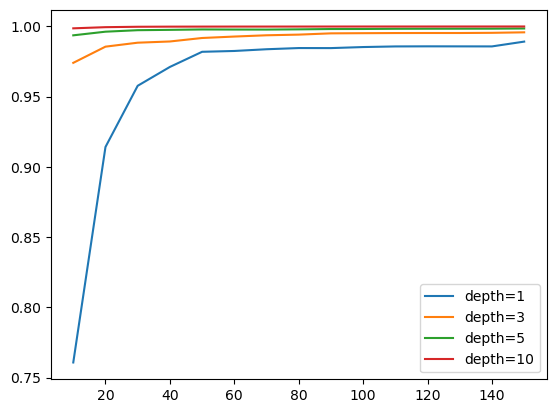

In [123]:
auc_scores = {}

for depth in [1, 3, 5, 10]:
    print("depth: %s" % depth)
    aucs = []

    for i in range(10, 151, 10):
        rf = RandomForestClassifier(
            n_estimators=i, max_depth=depth, random_state=1, n_jobs=-1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class="ovr")
        print("%s -> %.3f" % (i, auc))
        aucs.append(auc)

    auc_scores[depth] = aucs
    print()

num_trees = list(range(10, 151, 10))
plt.plot(num_trees, auc_scores[1], label="depth=1")
plt.plot(num_trees, auc_scores[3], label="depth=3")
plt.plot(num_trees, auc_scores[5], label="depth=5")
plt.plot(num_trees, auc_scores[10], label="depth=10")
plt.legend()

min_samples: 3
10 -> 0.994
20 -> 0.996
30 -> 0.997
40 -> 0.997
50 -> 0.998
60 -> 0.998
70 -> 0.998
80 -> 0.998
90 -> 0.998
100 -> 0.998
110 -> 0.998
120 -> 0.998
130 -> 0.998
140 -> 0.998
150 -> 0.998

min_samples: 5
10 -> 0.991
20 -> 0.996
30 -> 0.997
40 -> 0.997
50 -> 0.998
60 -> 0.998
70 -> 0.998
80 -> 0.998
90 -> 0.998
100 -> 0.998
110 -> 0.998
120 -> 0.998
130 -> 0.998
140 -> 0.998
150 -> 0.998

min_samples: 10
10 -> 0.991
20 -> 0.995
30 -> 0.997
40 -> 0.997
50 -> 0.998
60 -> 0.998
70 -> 0.998
80 -> 0.998
90 -> 0.998
100 -> 0.998
110 -> 0.998
120 -> 0.998
130 -> 0.998
140 -> 0.998
150 -> 0.998



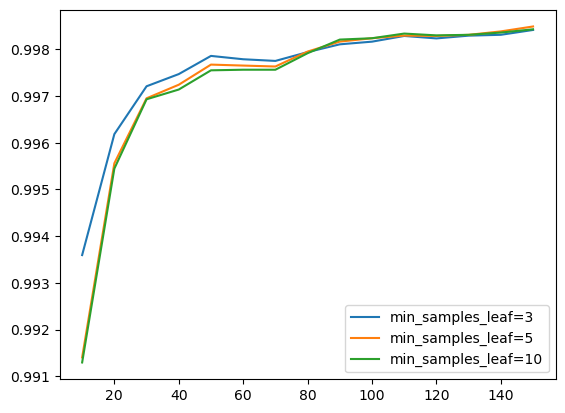

In [124]:
auc_scores = {}

for min_samples in [3, 5, 10]:
    print("min_samples: %s" % min_samples)
    aucs = []

    for i in range(10, 151, 10):
        rf = RandomForestClassifier(
            n_estimators=i,
            max_depth=5,
            min_samples_leaf=min_samples,
            random_state=1,
            n_jobs=-1,
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class="ovr")
        print("%s -> %.3f" % (i, auc))
        aucs.append(auc)

    auc_scores[min_samples] = aucs
    print()

num_trees = list(range(10, 151, 10))
plt.plot(num_trees, auc_scores[3], label="min_samples_leaf=3")
plt.plot(num_trees, auc_scores[5], label="min_samples_leaf=5")
plt.plot(num_trees, auc_scores[10], label="min_samples_leaf=10")
plt.legend()


Does not make any difference.

### Best model

## Gradient Boosting Out-of-Bag estimates

In [125]:
from scipy.special import expit

In [126]:
from sklearn import ensemble
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold, train_test_split

In [ ]:
# y_train = y_train.ravel()

In [ ]:
params = {
    "n_estimators": 1200,
    "max_depth": 3,
    "subsample": 0.5,
    "learning_rate": 0.01,
    "min_samples_leaf": 1,
    "random_state": 42,
}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

n_estimators = params["n_estimators"]
x = np.arange(n_estimators) + 1

def heldout_score(clf, X_test, y_test):
    """compute deviance scores on ``X_test`` and ``y_test``."""
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_proba in enumerate(clf.staged_predict_proba(X_test)):
        score[i] = 2 * log_loss(y_test, y_proba[:, 1])
    return score

def cv_estimate(n_splits=None):
    cv = KFold(n_splits=n_splits)
    cv_clf = ensemble.GradientBoostingClassifier(**params)
    val_scores = np.zeros((n_estimators,), dtype=np.float64)
    
    for train, test in cv.split(X_train, y_train):
        cv_clf.fit(X_train.iloc[train], y_train.iloc[train])
        val_scores += heldout_score(cv_clf, X_train.iloc[test], y_train.iloc[test])
    val_scores /= n_splits
    return val_scores

# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test, y_test)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# line type for the three curves
oob_line = "dashed"
test_line = "solid"
cv_line = "dashdot"

# plot curves and vertical lines for best iterations
plt.figure(figsize=(8, 4.8))
plt.plot(x, cumsum, label="OOB loss", color=oob_color, linestyle=oob_line)
plt.plot(x, test_score, label="Test loss", color=test_color, linestyle=test_line)
plt.plot(x, cv_score, label="CV loss", color=cv_color, linestyle=cv_line)
plt.axvline(x=oob_best_iter, color=oob_color, linestyle=oob_line)
plt.axvline(x=test_best_iter, color=test_color, linestyle=test_line)
plt.axvline(x=cv_best_iter, color=cv_color, linestyle=cv_line)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(
    xticks[0].tolist() + [oob_best_iter, cv_best_iter, test_best_iter]
)
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) + ["OOB", "CV", "Test"])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label, rotation=90)

plt.legend(loc="upper center")
plt.ylabel("normalized loss")
plt.xlabel("number of iterations")

plt.show();

## Gradient Boosting regression

## XGBoost

In [138]:
df_no_missing[cat_features] = df_no_missing[cat_features].astype("category")
df_no_missing.dtypes

name                      object
cap-diameter             float64
cap-shape               category
cap-color               category
does-bruise-or-bleed    category
gill-color              category
stem-height              float64
stem-width               float64
stem-color              category
has-ring                category
habitat                 category
season                  category
dtype: object

In [140]:
df_full_train, df_test = train_test_split(
    df_no_missing, test_size=0.2, random_state=42, stratify=df_no_missing["name"]
)
df_train, df_val = train_test_split(
    df_full_train, test_size=0.25, random_state=42, stratify=df_full_train["name"]
)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.name).values
y_val = (df_val.name).values
y_test = (df_test.name).values

del df_train["name"]
del df_val["name"]
del df_test["name"]

In [141]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 402028 stored elements and shape (36548, 63)>

In [144]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encode the target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


params = {
    "n_estimators": 1200,
    "max_depth": 3,
    "subsample": 0.5,
    "learning_rate": 0.2,
    "min_child_weight": 1,
    "random_state": 42,
    "enable_categorical": True,
#    "tree_method": "gpu_hist",  # Use GPU acceleration
#    "predictor": "gpu_predictor"  # Use GPU for prediction
}

xgboost = xgb.XGBClassifier(**params)

# Fit the model
xgboost.fit(X_train, y_train_encoded)

# Evaluate accuracy
acc = xgboost.score(X_test, y_test_encoded)
print("Accuracy: {:.4f}".format(acc))

# Roc Auc
roc_auc = roc_auc_score(y_test_encoded, xgboost.predict_proba(X_test), multi_class="ovr")
print("Roc Auc: {:.4f}".format(roc_auc))

Accuracy: 0.1208
Roc Auc: 0.8955


In [88]:
xgb.__version__

'2.1.2'

### Grid search

<div class="alert alert-block alert-danger">
<b>ATTENTION:</b>  <br> This is a very time-consuming process. It is recommended to run this on a machine with a lot of computational power. <br> Took 7 h on MacBook Pro 13" M1, 2020 16 GB
</div>

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the parameter grid
# param_grid = {
#     "n_estimators": [300, 500, 1000],
#     "max_depth": [2, 3, 5, 10],
#     "learning_rate": [0.01, 0.1, 0.2, 0.5],
#     "subsample": [0.5, 0.8],
#     "min_child_weight": [1, 3],
# }

# # Create the XGBClassifier
# xgboost = xgb.XGBClassifier(random_state=42, enable_categorical=True)

# # Create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=xgboost,
#     param_grid=param_grid,
#     scoring="accuracy",  # You can change this to other metrics like "roc_auc", "f1_weighted", etc.
#     cv=3,  # 3-fold cross-validation
#     verbose=2,  # Prints progress
#     n_jobs=-1,  # Use all available cores
# )

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train_encoded)

# # Print the best parameters and the corresponding score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Evaluate on the test set
# best_model = grid_search.best_estimator_
# test_accuracy = best_model.score(X_test, y_test_encoded)
# print("Test Set Accuracy: {:.4f}".format(test_accuracy))

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=300, subsample=0.8; total time= 3.0min
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=300, subsample=0.8; total time= 3.0min
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=300, subsample=0.8; total time= 3.0min
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=300, subsample=0.5; total time= 3.0min
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=300, subsample=0.5; total time= 3.1min
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=300, subsample=0.5; total time= 3.1min
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=500, subsample=0.5; total time= 4.9min
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=500, subsample=0.5; total time= 4.9min
[CV] END learning_rate=0.

/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, subsample=0.5; total time= 6.3min
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, subsample=0.5; total time= 5.7min
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 5.8min
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 5.8min
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 5.8min
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.5; total time= 3.2min
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.5; total time= 3.2min
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.5; total time= 3.4min
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=1000

/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9885903312020644
Test Set Accuracy: 0.0354


```plaintext
/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9885903312020644
Test Set Accuracy: 0.0354
```

## AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_leaf_nodes=15)
n_estimators = 300

adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    learning_rate=0.5,
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,
).fit(X_train, y_train)


/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [77]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier()

def misclassification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)


weak_learners_misclassification_error = misclassification_error(
    y_test, weak_learner.fit(X_train, y_train).predict(X_test)
    )

dummy_classifiers_misclassification_error = misclassification_error(
    y_test, dummy_clf.fit(X_train, y_train).predict(X_test)
    )

print("Desicion Tree Misclassification Error: "
      f"{weak_learners_misclassification_error:.3f}"
      )
print("Dummy Classifier Misclassification Error: "
      f"{dummy_classifiers_misclassification_error:.3f}"
    )

Desicion Tree Misclassification Error: 0.918
Dummy Classifier Misclassification Error: 0.996


/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


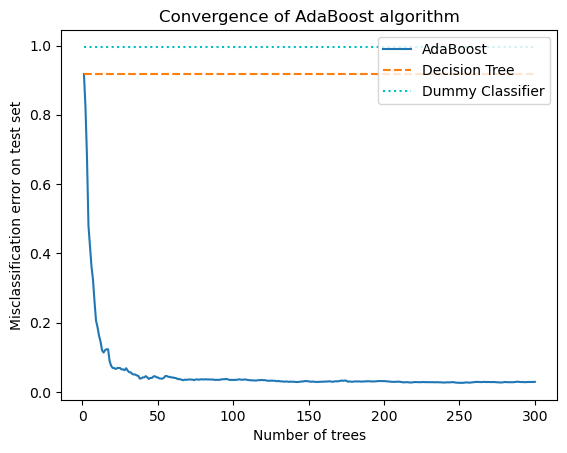

In [78]:
boosting_errors = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "AdaBoost": [
            misclassification_error(y_test, y_pred)
            for y_pred in adaboost_clf.staged_predict(X_test)
        ],
    }
).set_index("Number of trees")
ax = boosting_errors.plot()
ax.set_xlabel("Number of trees")
ax.set_ylabel("Misclassification error on test set")
ax.set_title("Convergence of AdaBoost algorithm")

plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [weak_learners_misclassification_error, weak_learners_misclassification_error],
    color="tab:orange",
    linestyle="dashed",
)
plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [
        dummy_classifiers_misclassification_error,
        dummy_classifiers_misclassification_error,
    ],
    color="c",
    linestyle="dotted",
)
plt.legend(["AdaBoost", "Decision Tree", "Dummy Classifier"], loc=1)
plt.show();

/var/folders/r8/zdlnr35s6qz6zx67nmc9bdnm0000gn/T/ipykernel_6798/3078083739.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


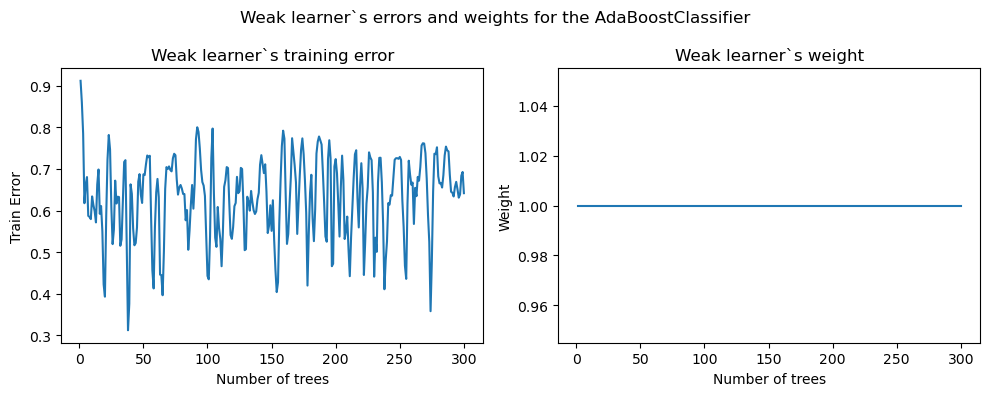

In [79]:
weak_learners_info = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "Errors": adaboost_clf.estimator_errors_,
        "Weights": adaboost_clf.estimator_weights_,
    }
).set_index("Number of trees")

axs = weak_learners_info.plot(subplots=True, layout=(1, 2), figsize=(10, 4), legend=False, color="tab:blue")
axs[0, 0].set_ylabel("Train Error")
axs[0, 0].set_title("Weak learner`s training error")
axs[0, 1].set_ylabel("Weight")
axs[0, 1].set_title("Weak learner`s weight")
fig = axs[0, 0].get_figure()
fig.suptitle("Weak learner`s errors and weights for the AdaBoostClassifier")
fig.tight_layout()
fig.show();

Additiv model not working?

## HistGradientBoostingRegressor

## from scripts

In [63]:
X_train, X_test, y_train, y_test, model, y_prob, y_pred = mushroom_class_fix.classify_data(
        df_no_missing, mode="lda", encode=True, impute=False
    )

In [64]:
mushroom_class_fix.get_confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[66. 13.]
 [ 0. 68.]]


array([[66., 13.],
       [ 0., 68.]])

In [65]:
# mushroom_class_fix.get_evaluation_scores_dict(y_test, y_pred, average="micro")

In [66]:
model = mushroom_class_fix.train_model(X_train, y_train, mode="log_reg")

In [67]:
y_prob, y_pred = mushroom_class_fix.get_y_prob_pred(X_test, model)

In [68]:
print("Conf.-Mat.: " + str(mushroom_class_fix.get_confusion_matrix(y_test, y_pred)))


Confusion Matrix:
[[79.  0.]
 [ 0. 68.]]
Conf.-Mat.: [[79.  0.]
 [ 0. 68.]]


In [69]:
mushroom_class_fix.get_evaluation_scores_dict(y_test, y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].